In [115]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL

from stable_baselines3 import TD3, PPO
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.vec_env import DummyVecEnv
import torch as th

In [116]:
df = pd.read_csv("input_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df.drop(["Symbol"], axis=1, inplace=True)

In [117]:
df2 = df.iloc[::-1]
env = gym.make('stocks-v0', df=df, frame_bound=(48, 22000), window_size=48)

info: {'total_reward': 140.15972900390625, 'total_profit': 9.013903103177356e-36, 'position': <Positions.Short: 0>}


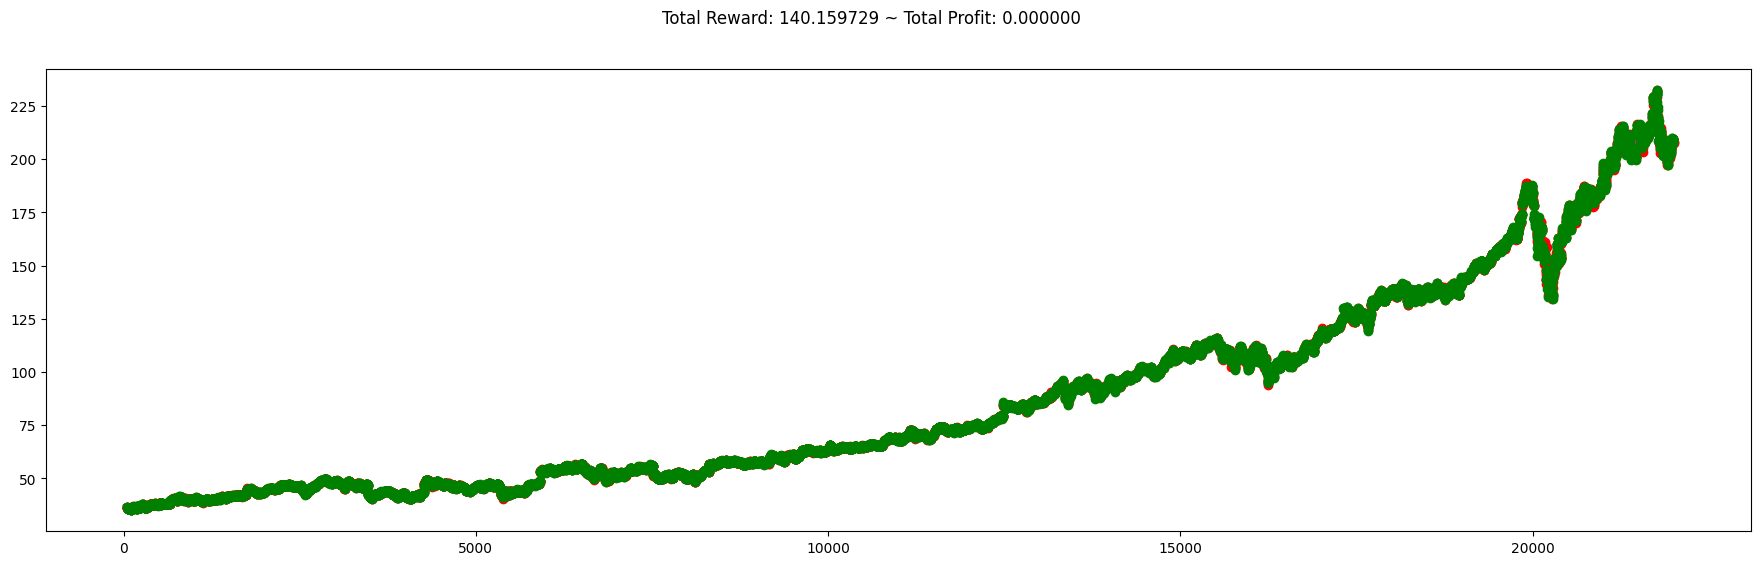

In [119]:
observation = env.reset(seed=2023)
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        print("info:", info)
        break

plt.figure(figsize=(22,6))
plt.cla()
env.unwrapped.render_all()
plt.show()

In [120]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(48, 22000), window_size=48)
env = DummyVecEnv([env_maker])

In [121]:
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000)

Using cuda device
-----------------------------
| time/              |      |
|    fps             | 975  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 689         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.018613413 |
|    clip_fraction        | 0.0836      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.679      |
|    explained_variance   | 0.00094     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0424      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00337    |
|    value_loss           | 0.0864      |
-----------------------------------------
----------------

info {'total_reward': 11.35995864868164, 'total_profit': 0.00038167706678155546, 'position': <Positions.Long: 1>}


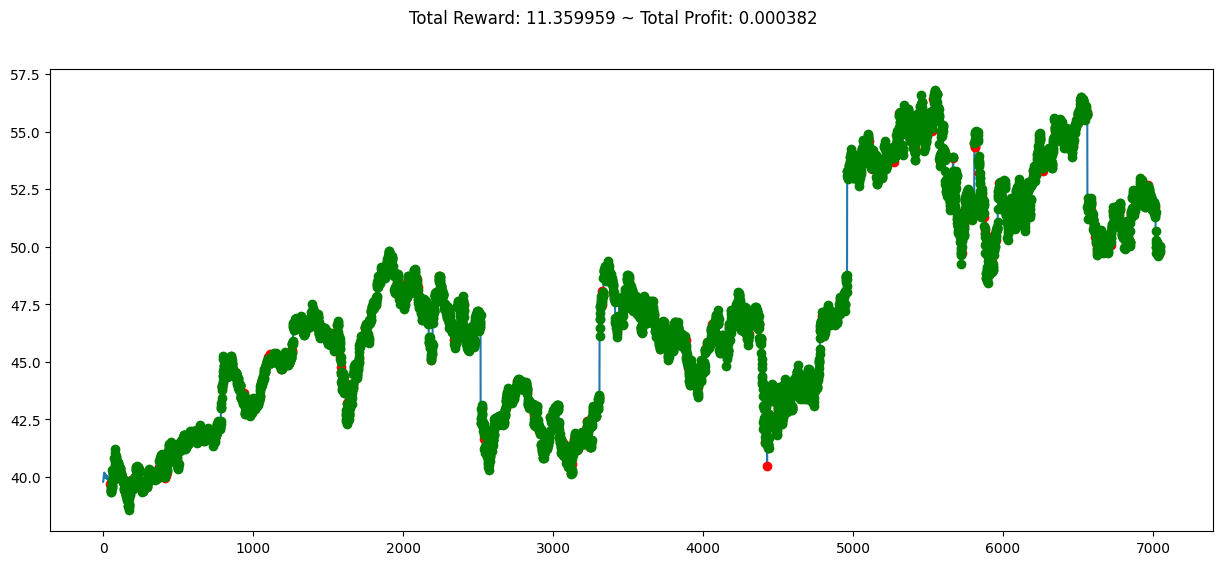

In [112]:
env = gym.make('stocks-v0', df=df, frame_bound=(1000,8000), window_size=48)
obs, info = env.reset()
while True:
    obs = obs[np.newaxis, ...] 
    action, _states = model.predict(obs)
    obs, rewards, terminated, truncated, info = env.step(action)
    done = terminated or truncated    
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.show()

model.save("ppo_stock_trading_anytrading")